<a href="https://colab.research.google.com/github/Gops03/TEORIA_DE_SE-ALES/blob/main/RADIOIX_REDNEURONALipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as sig
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import welch

In [ ]:
def audio_matrix(path, scaler):
    fs_v = []
    audio_m = []

    for file in os.listdir(path):
        file_path = os.path.join(path, file)


        y, sr = librosa.load(file_path, sr=None)
        y = librosa.to_mono(y)
        y = y.reshape(-1, 1)
        y = scaler.fit_transform(y)
        y = y.flatten()

        fs_v.append(sr)
        audio_m.append(y)

    # Calcular la frecuencia de muestreo promedio
    fs = np.mean(fs_v)

    # Asegurarse de que todos los arreglos de audio tengan la misma longitud
    max_length = max(len(y) for y in audio_m)
    audio_m_padded = np.array([np.pad(y, (0, max_length - len(y)), 'constant') for y in audio_m])

    return audio_m_padded, fs

In [ ]:
path = r'/content/drive/My Drive/TDS/ANEaudios'
scaler = MinMaxScaler(feature_range=(-1, 1))
audio_m, fs = audio_matrix(path, scaler)

df = pd.read_excel('/content/drive/My Drive/TDS/Audios.xlsx')

df.head()

,Nombre,presencia,Columna1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,100.0_0_.wav,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100.0_1_.wav,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100.0_2_.wav,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100.0_3_.wav,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0_4_.wav,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Seleccionar solo las columnas 'Nombre ' y 'presencia '
df_filtered = df[['Nombre ', 'presencia ']]

# Verificar el resultado mostrando las primeras 10 filas
print(df_filtered.head(1205))


           Nombre   presencia 
0     100.0_0_.wav           0
1     100.0_1_.wav           0
2     100.0_2_.wav           0
3     100.0_3_.wav           1
4     100.0_4_.wav           0
...            ...         ...
1200   99.9_1_.wav           1
1201   99.9_2_.wav           1
1202   99.9_3_.wav           1
1203   99.9_4_.wav           1
1204   99.9_5_.wav           1

[1205 rows x 2 columns]


In [ ]:

# Crear un DataFrame con las filas donde presencia == 1
df_presencia_1 = df_filtered[df_filtered['presencia '] == 1][['Nombre ', 'presencia ']]

# Crear un DataFrame con las filas donde presencia == 0
df_presencia_0 = df_filtered[df_filtered['presencia '] == 0][['Nombre ', 'presencia ']]

# Convertir DataFrames a arrays si es necesario
array_presencia_1 = df_presencia_1.to_numpy()
array_presencia_0 = df_presencia_0.to_numpy()


# Imprimir los DataFrames para confirmar los nombres de las columnas
print("DataFrame presencia == 1:")
print(df_presencia_1)

print("\nDataFrame presencia == 0:")
print(df_presencia_0)

DataFrame presencia == 1:
           Nombre   presencia 
3     100.0_3_.wav           1
6     100.1_0_.wav           1
12    100.2_0_.wav           1
15    100.2_3_.wav           1
18    100.3_0_.wav           1
...            ...         ...
1200   99.9_1_.wav           1
1201   99.9_2_.wav           1
1202   99.9_3_.wav           1
1203   99.9_4_.wav           1
1204   99.9_5_.wav           1

[544 rows x 2 columns]

DataFrame presencia == 0:
           Nombre   presencia 
0     100.0_0_.wav           0
1     100.0_1_.wav           0
2     100.0_2_.wav           0
4     100.0_4_.wav           0
5     100.0_5_.wav           0
...            ...         ...
1170   99.4_1_.wav           0
1171   99.4_2_.wav           0
1172   99.4_3_.wav           0
1173   99.4_4_.wav           0
1174   99.4_5_.wav           0

[661 rows x 2 columns]


In [ ]:
# Convertir audio_m a DataFrame
df_audio_m = pd.DataFrame(audio_m)

# Extraer los nombres de df_filtered
nombres = df_filtered['Nombre '].tolist()

# Verificar que el tamaño coincida
if len(df_audio_m) == len(nombres):
    df_audio_m['Nombre'] = nombres
    # Reordenar las columnas para colocar 'Nombre' al principio
    df_audio_m = df_audio_m[['Nombre'] + [col for col in df_audio_m.columns if col != 'Nombre']]
else:
    raise ValueError("El tamaño de audio_m no coincide con el tamaño de df_filtered.")

# Mostrar el DataFrame resultante
print(df_audio_m.head(1205))

            Nombre         0         1         2         3         4  \
0     100.0_0_.wav -0.136573 -0.136583 -0.136458 -0.136461 -0.137390   
1     100.0_1_.wav  0.116605  0.116664  0.116525  0.115399  0.116953   
2     100.0_2_.wav  0.714141  0.714135  0.714211  0.714070  0.713684   
3     100.0_3_.wav -0.268610 -0.268609 -0.268472 -0.268262 -0.269450   
4     100.0_4_.wav  0.408813  0.408819  0.408864  0.409072  0.408705   
...            ...       ...       ...       ...       ...       ...   
1200   99.9_1_.wav -0.525535 -0.525454 -0.526296 -0.529630 -0.531358   
1201   99.9_2_.wav -0.561343 -0.561342 -0.561189 -0.561069 -0.562265   
1202   99.9_3_.wav  0.656144  0.656148  0.656113  0.655975  0.656407   
1203   99.9_4_.wav -0.347643 -0.347650 -0.347480 -0.346745 -0.348247   
1204   99.9_5_.wav  0.295913  0.295312  0.298331  0.302807  0.283944   

             5         6         7         8  ...     83876     83877  \
0    -0.136771 -0.133002 -0.132679 -0.138661  ... -0.172949 -0

In [ ]:
import pandas as pd

# Supongamos que df_audio_m ya tiene la columna 'Nombre' agregada

# Crear un DataFrame con las filas donde presencia == 1
df_presencia_1 = df_filtered[df_filtered['presencia '] == 1][['Nombre ', 'presencia ']]

# Crear un DataFrame con las filas donde presencia == 0
df_presencia_0 = df_filtered[df_filtered['presencia '] == 0][['Nombre ', 'presencia ']]

# Convertir los DataFrames a listas para la búsqueda
nombres_presencia_1 = df_presencia_1['Nombre '].tolist()
nombres_presencia_0 = df_presencia_0['Nombre '].tolist()

# Filtrar df_audio_m en dos DataFrames según la presencia
df_audio_m_presencia_1 = df_audio_m[df_audio_m['Nombre'].isin(nombres_presencia_1)]
df_audio_m_presencia_0 = df_audio_m[df_audio_m['Nombre'].isin(nombres_presencia_0)]

# Eliminar la columna 'Nombre' de los DataFrames resultantes
df_audio_m_presencia_1 = df_audio_m_presencia_1.drop(columns=['Nombre'])
df_audio_m_presencia_0 = df_audio_m_presencia_0.drop(columns=['Nombre'])

# Convertir DataFrames a arrays
array_audio_m_presencia_1 = df_audio_m_presencia_1.to_numpy()
array_audio_m_presencia_0 = df_audio_m_presencia_0.to_numpy()

# Imprimir los arrays para confirmar
print("Array audio_m presencia == 1:")
print(array_audio_m_presencia_1)

print("\nArray audio_m presencia == 0:")
print(array_audio_m_presencia_0)



Array audio_m presencia == 1:
[[-0.26861048 -0.26860914 -0.26847175 ... -0.22667432 -0.22924888
  -0.23227277]
 [-0.03141838 -0.03077978 -0.03502262 ... -0.05308519 -0.54668885
  -0.7284427 ]
 [-0.77294517 -0.77294624 -0.7729438  ... -0.7715892  -0.77082664
  -0.77342063]
 ...
 [ 0.6561445   0.65614843  0.65611297 ...  0.6518173   0.6521233
   0.6542835 ]
 [-0.34764254 -0.34764957 -0.34747958 ... -0.3393052  -0.3324798
  -0.3094619 ]
 [ 0.2959125   0.295312    0.29833132 ... -0.04625407 -0.13414013
  -0.18134916]]

Array audio_m presencia == 0:
[[-0.13657266 -0.1365833  -0.13645768 ... -0.14233692 -0.1459915
  -0.16404638]
 [ 0.11660492  0.11666434  0.11652511 ...  0.1776877   0.20722333
   0.22532418]
 [ 0.7141409   0.7141348   0.71421117 ...  0.7133693   0.71282256
   0.7113868 ]
 ...
 [ 0.725037    0.7250481   0.7250834  ...  0.7879914   0.78649163
   0.7821225 ]
 [ 0.18118763  0.18098022  0.18144326 ...  0.1578518   0.14224836
   0.12836298]
 [ 0.26856625  0.268487    0.26916143 ..

In [ ]:
import numpy as np
from scipy.signal import welch

def calcular_psd_promedio_señal(array_audio, percentil=80):
    # Inicializar una lista para guardar los promedios del PSD de cada señal
    psd_promedios = []

    for señal in array_audio:
        # Calcular el PSD de cada señal
        f, psd = welch(señal, fs)  # Cambia fs (frecuencia de muestreo) si es necesario

        # Calcular la media y desviación estándar del PSD
        media_psd = np.mean(psd)
        std_psd = np.std(psd)

        # Determinar los límites del intervalo alrededor de la media
        limite_inferior = media_psd - (std_psd * (100 - percentil) / 100)
        limite_superior = media_psd + (std_psd * (100 - percentil) / 100)

        # Filtrar los valores del PSD que están dentro del intervalo
        psd_filtrado = psd[(psd >= limite_inferior) & (psd <= limite_superior)]

        # Calcular el promedio del PSD filtrado
        psd_promedio = np.mean(psd_filtrado)
        psd_promedios.append(psd_promedio)

    # Convertir la lista de promedios a un array
    return np.array(psd_promedios)

# Calcular el promedio del PSD para cada señal en presencia == 1
psd_promedio_presencia_1 = calcular_psd_promedio_señal(array_audio_m_presencia_1)

# Calcular el promedio del PSD para cada señal en presencia == 0
psd_promedio_presencia_0 = calcular_psd_promedio_señal(array_audio_m_presencia_0)

# Imprimir los resultados
print("Promedio del PSD para señales con presencia == 1:")
print(psd_promedio_presencia_1)

print("\nPromedio del PSD para señales con presencia == 0:")
print(psd_promedio_presencia_0)


Promedio del PSD para señales con presencia == 1:
[2.00062562e-08 7.26241024e-06 3.48729268e-09 4.05675928e-06
 1.80046823e-06 5.53737536e-08 2.47428193e-08 5.04253173e-08
 1.39621585e-08 1.85191720e-06 1.49907375e-08 6.82416248e-06
 1.57414668e-08 3.15257900e-08 1.68089571e-06 1.56716544e-06
 4.74390793e-09 2.67433575e-06 2.41637827e-06 6.70020086e-07
 1.58029323e-08 1.54473568e-07 8.97456154e-09 1.66943195e-07
 3.91651227e-08 5.46825625e-08 1.47752175e-08 2.69383946e-08
 2.30002879e-08 6.10779338e-08 2.84827184e-08 7.53862287e-06
 1.65433480e-08 2.40853399e-08 1.41353196e-08 2.71502768e-06
 9.73903624e-09 6.63705091e-09 2.02261262e-07 3.96332833e-09
 1.69982730e-08 8.73247870e-07 3.78238454e-08 3.33060761e-08
 9.53023005e-07 3.67802926e-08 4.23421120e-08 1.32446623e-08
 5.54794859e-08 9.50520196e-09 7.93315493e-08 1.84288780e-08
 3.47299327e-08 2.52907597e-08 1.75575945e-08 2.50202934e-08
 1.33521816e-08 3.37943078e-08 4.48384526e-06 1.15187806e-08
 1.52268319e-06 1.47016479e-08 1.53

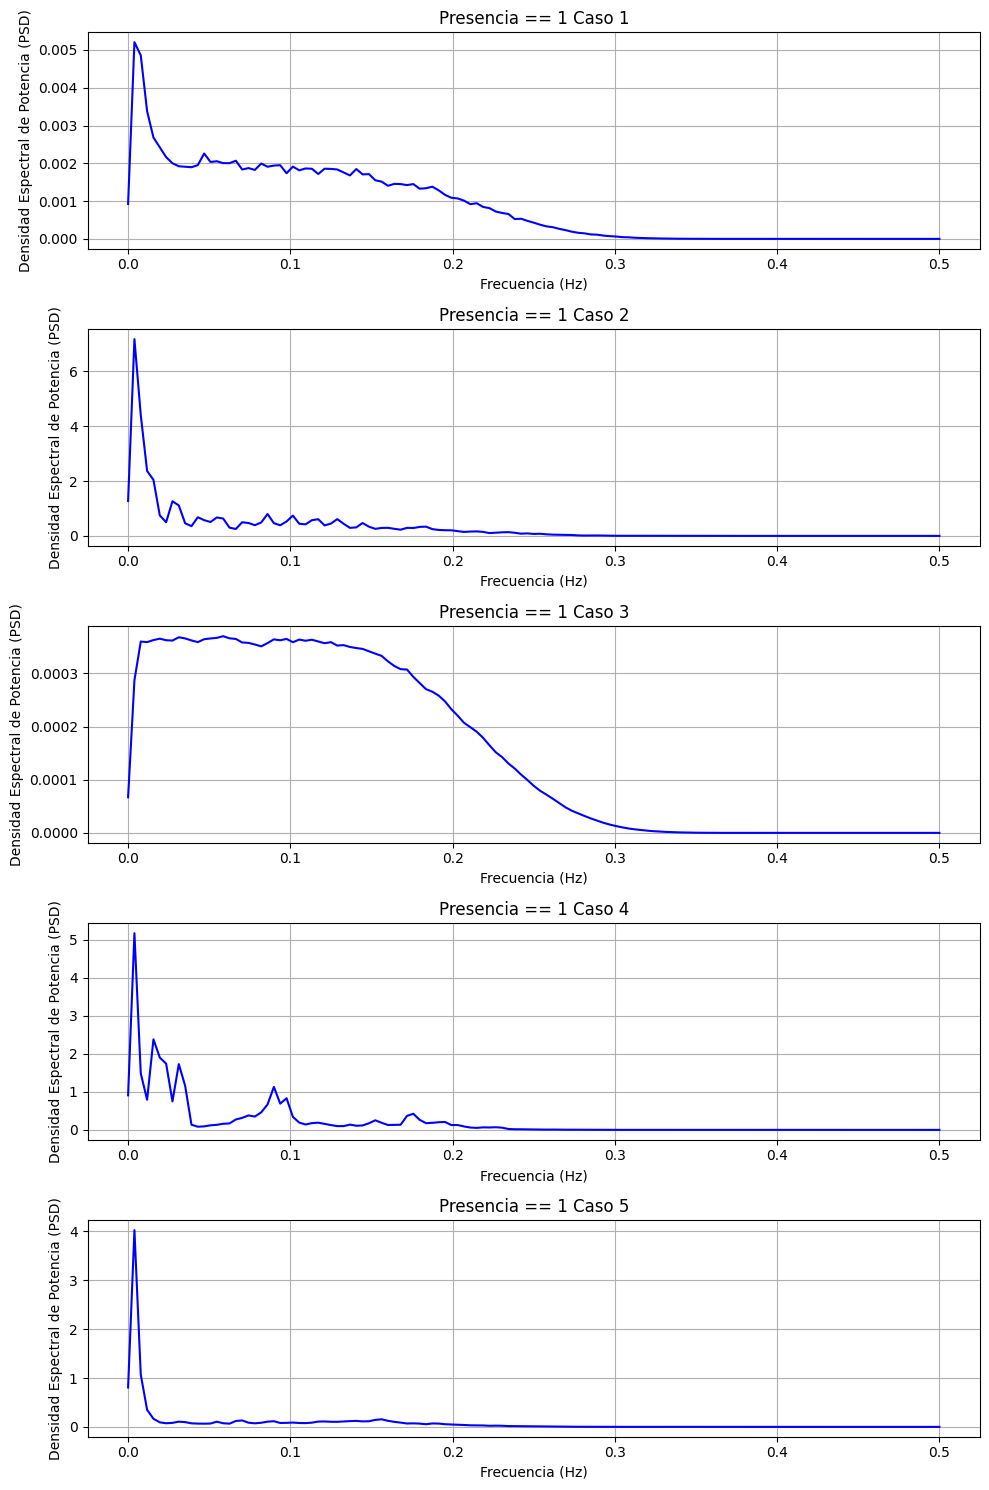

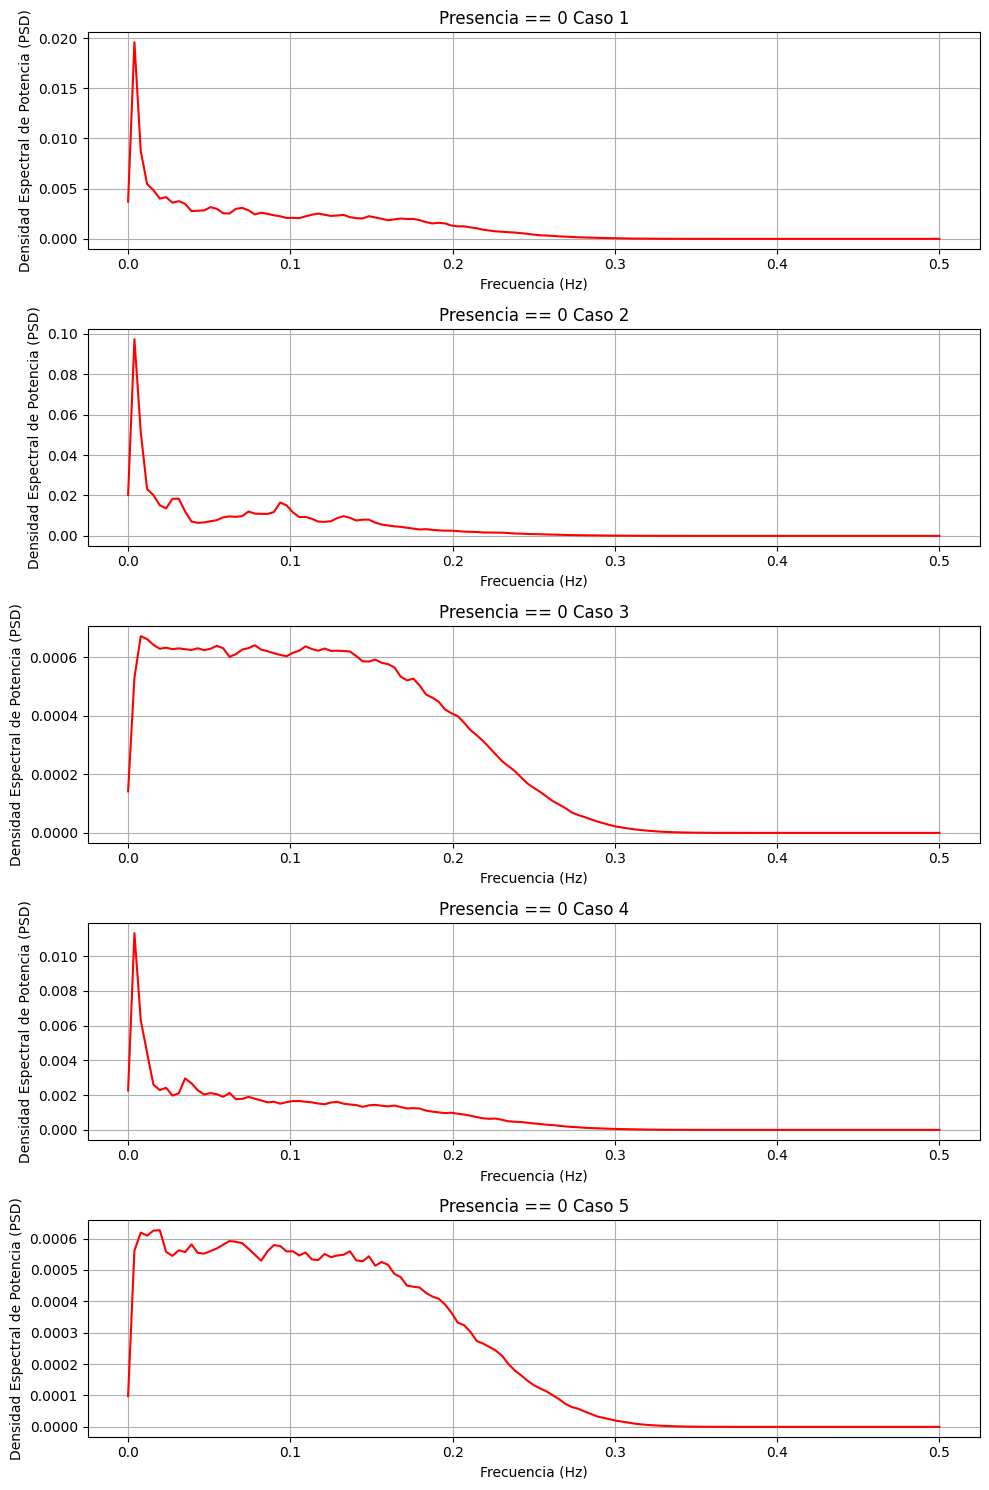

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

def calcular_psd_señal(señal, fs=1.0):
    # Calcular el PSD de una señal
    f, psd = welch(señal, fs)
    return f, psd

def plotear_psd_casos(array_audio, num_casos=5, fs=1.0, color='blue', label='Presencia', start_idx=0):
    # Ajustar el tamaño de la figura para que sea más alta y menos ancha
    plt.figure(figsize=(10, 15))

    for i in range(num_casos):
        # Seleccionar la señal i
        señal = array_audio[start_idx + i]
        # Calcular el PSD
        f, psd = calcular_psd_señal(señal, fs)
        # Crear un subplot para cada señal
        plt.subplot(num_casos, 1, i + 1)
        plt.plot(f, psd, color=color)
        plt.title(f'{label} Caso {i + 1}')
        plt.xlabel('Frecuencia (Hz)')
        plt.ylabel('Densidad Espectral de Potencia (PSD)')
        plt.grid(True)

    # Ajustar el layout para que no se solapen los subplots
    plt.tight_layout()
    plt.show()

# Graficar 5 casos de PSD para presencia == 1 en subplots separados
plotear_psd_casos(array_audio_m_presencia_1, num_casos=5, color='blue', label='Presencia == 1', start_idx=0)

# Graficar 5 casos de PSD para presencia == 0 en subplots separados
plotear_psd_casos(array_audio_m_presencia_0, num_casos=5, color='red', label='Presencia == 0', start_idx=0)


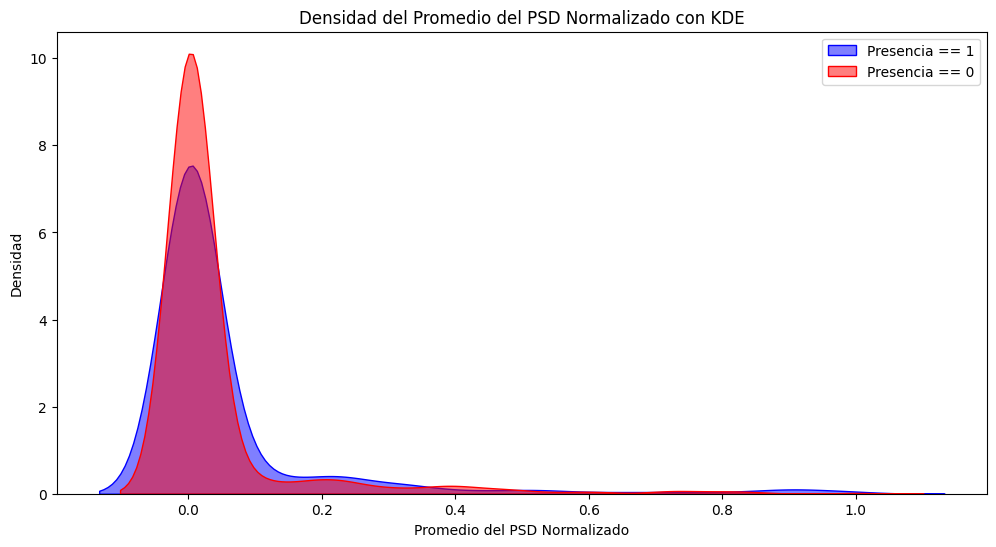

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Función para normalizar los datos entre 0 y 1
def normalizar_datos(datos):
    scaler = MinMaxScaler()
    datos_normalizados = scaler.fit_transform(datos.reshape(-1, 1)).flatten()
    return datos_normalizados

# Normalizar los promedios del PSD
psd_promedio_presencia_1_normalizado = normalizar_datos(psd_promedio_presencia_1)
psd_promedio_presencia_0_normalizado = normalizar_datos(psd_promedio_presencia_0)

# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# KDE para presencia == 1
sns.kdeplot(psd_promedio_presencia_1_normalizado, color='blue', label='Presencia == 1', fill=True, alpha=0.5)

# KDE para presencia == 0
sns.kdeplot(psd_promedio_presencia_0_normalizado, color='red', label='Presencia == 0', fill=True, alpha=0.5)

# Añadir etiquetas y leyenda
plt.xlabel('Promedio del PSD Normalizado')
plt.ylabel('Densidad')
plt.title('Densidad del Promedio del PSD Normalizado con KDE')
plt.legend()

# Mostrar la gráfica
plt.show()
